<h1><b>Лабораторная работа №5 ч.2 </b></h1>
Анализ ансамблевых методов машинного обучения

1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from gmdh import Combi, Multi, Mia, Ria
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загрузка данных
data = pd.read_csv('water_pollution_disease.csv')

# Просмотр первых строк данных
print(data.head())


     Country   Region  Year Water Source Type  Contaminant Level (ppm)  \
0     Mexico    North  2015              Lake                     6.06   
1     Brazil     West  2017              Well                     5.24   
2  Indonesia  Central  2022              Pond                     0.24   
3    Nigeria     East  2016              Well                     7.91   
4     Mexico    South  2005              Well                     0.12   

   pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
0      7.12             3.93                     4.28                  8.28   
1      7.84             4.79                     3.86                 15.74   
2      6.43             0.79                     3.42                 36.67   
3      6.71             1.96                     3.12                 36.92   
4      8.16             4.22                     9.15                 49.35   

   Lead Concentration (µg/L)  ...  Cholera Cases per 100,000 people  \
0        

In [4]:
# Основная информация о данных
print("\nИнформация о данных:")
print(data.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)     

In [5]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
print(data.isnull().sum())



Пропущенные значения:
Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index

In [6]:
# Описательная статистика
print("\nОписательная статистика:")
print(data.describe())


Описательная статистика:
              Year  Contaminant Level (ppm)     pH Level  Turbidity (NTU)  \
count  3000.000000              3000.000000  3000.000000      3000.000000   
mean   2012.012667                 4.954390     7.255847         2.480023   
std       7.229287                 2.860072     0.720464         1.419984   
min    2000.000000                 0.000000     6.000000         0.000000   
25%    2006.000000                 2.560000     6.630000         1.257500   
50%    2012.000000                 4.950000     7.280000         2.460000   
75%    2018.000000                 7.400000     7.870000         3.660000   
max    2024.000000                10.000000     8.500000         4.990000   

       Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
count              3000.000000            3000.00000   
mean                  6.492850              25.08025   
std                   2.027966              14.50517   
min                   3.000000               0.05000   


2. Визуализация данных

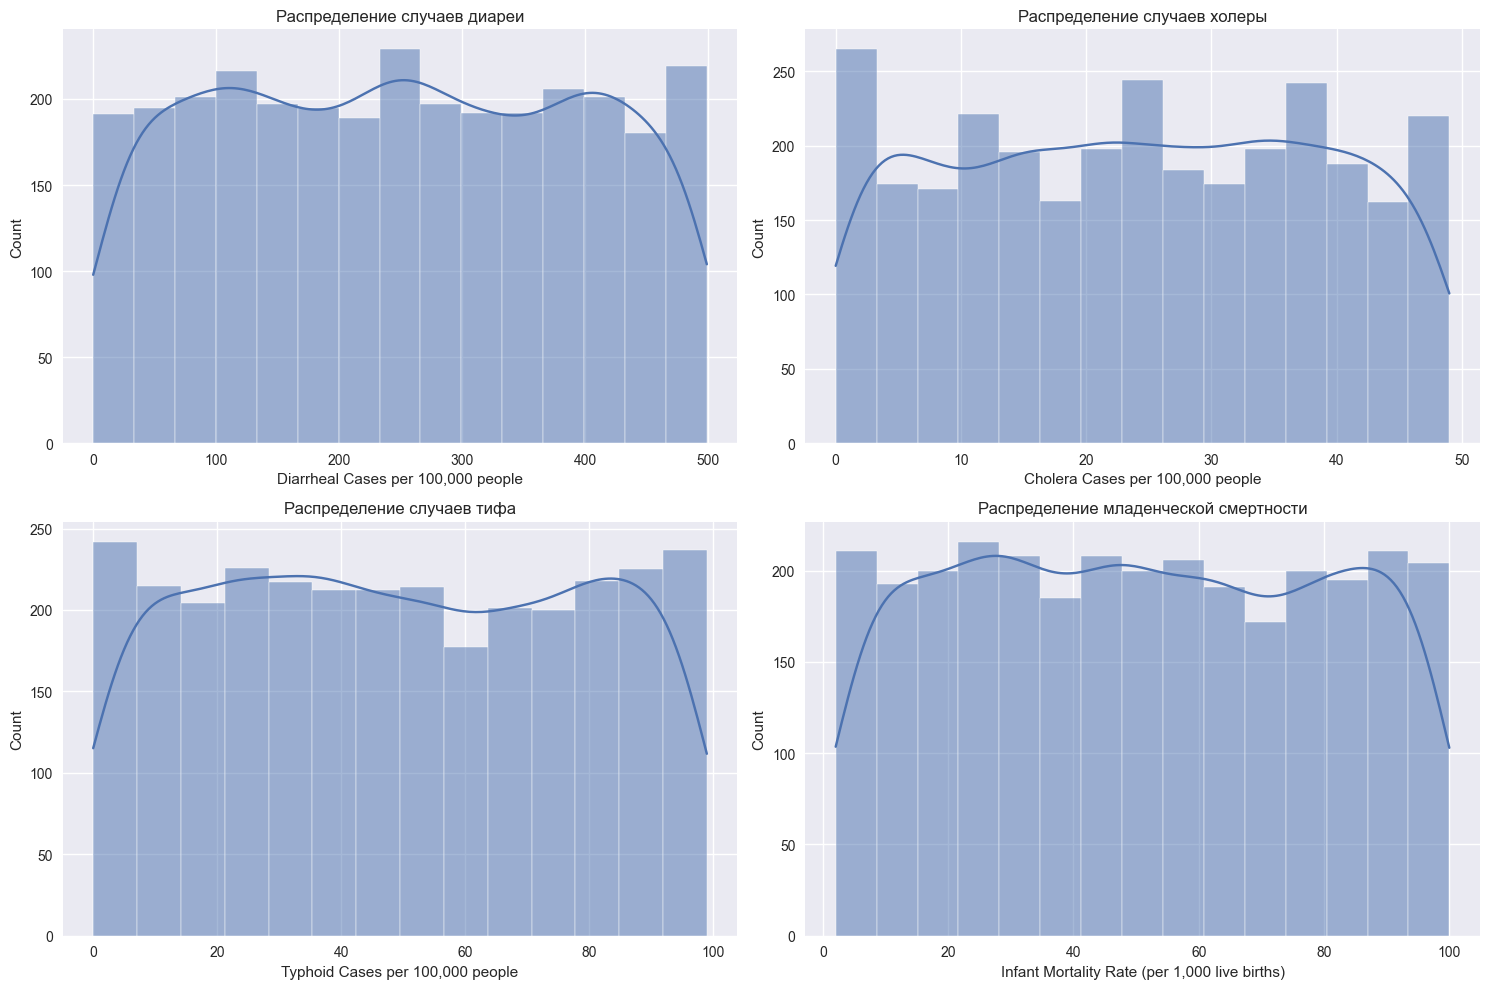

In [8]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8')  # Или другой доступный стиль из plt.style.available
plt.figure(figsize=(15, 10))

# Распределение случаев заболеваний
plt.subplot(2, 2, 1)
sns.histplot(data['Diarrheal Cases per 100,000 people'], kde=True)
plt.title('Распределение случаев диареи')

plt.subplot(2, 2, 2)
sns.histplot(data['Cholera Cases per 100,000 people'], kde=True)
plt.title('Распределение случаев холеры')

plt.subplot(2, 2, 3)
sns.histplot(data['Typhoid Cases per 100,000 people'], kde=True)
plt.title('Распределение случаев тифа')

plt.subplot(2, 2, 4)
sns.histplot(data['Infant Mortality Rate (per 1,000 live births)'], kde=True)
plt.title('Распределение младенческой смертности')

plt.tight_layout()
plt.show()

Корреляция между параметрами воды и заболеваниями

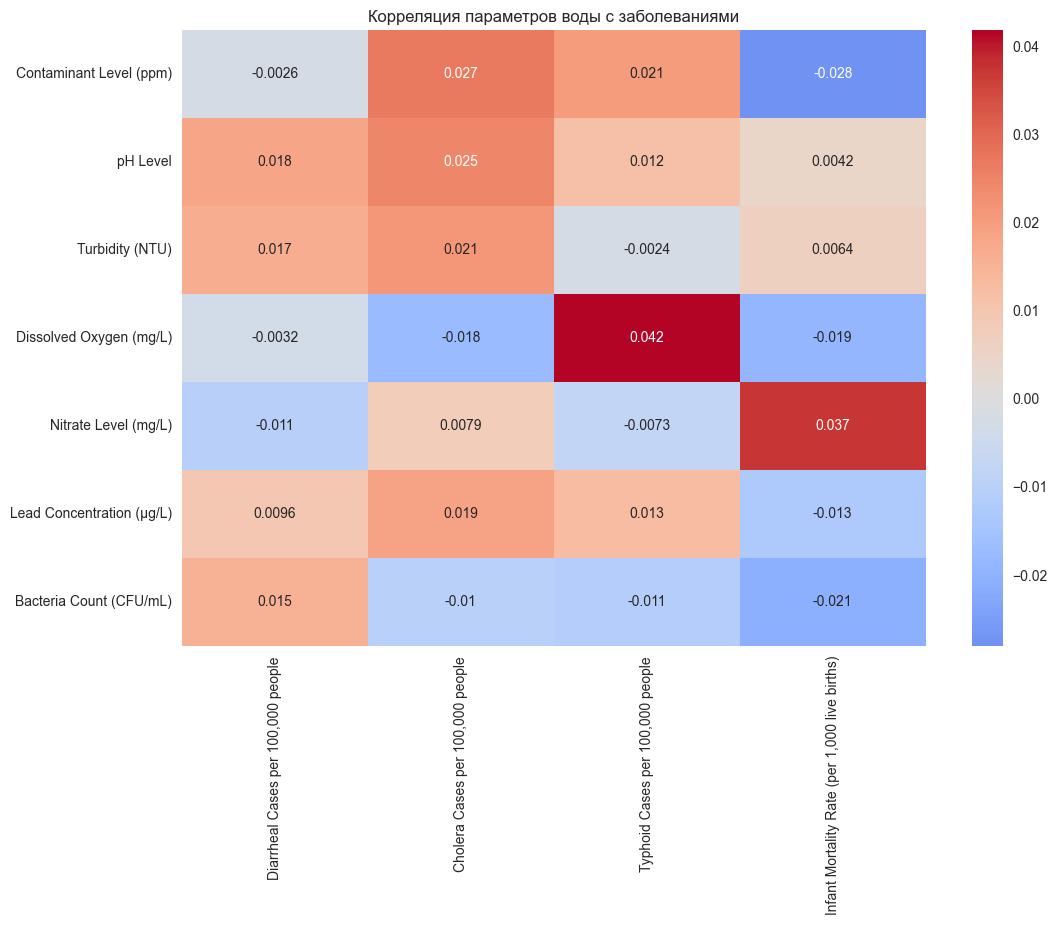

In [9]:
water_params = ['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 
                'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 
                'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)']

diseases = ['Diarrheal Cases per 100,000 people', 
            'Cholera Cases per 100,000 people', 
            'Typhoid Cases per 100,000 people',
            'Infant Mortality Rate (per 1,000 live births)']

plt.figure(figsize=(12, 8))
corr_matrix = data[water_params + diseases].corr()
sns.heatmap(corr_matrix[diseases].loc[water_params], annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция параметров воды с заболеваниями')
plt.show()

3. Подготовка данных для моделирования

Обработка пропущенных значений


In [10]:
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), 
                           columns=data.select_dtypes(include=[np.number]).columns)

Кодирование категориальных переменных


In [11]:
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data_imputed[col] = le.fit_transform(data[col])

Выбор признаков и целевых переменных

In [12]:
features = data_imputed.drop(diseases + ['Country', 'Region', 'Year'], axis=1)
target_diarrhea = data_imputed['Diarrheal Cases per 100,000 people']
target_cholera = data_imputed['Cholera Cases per 100,000 people']
target_typhoid = data_imputed['Typhoid Cases per 100,000 people']
target_infant = data_imputed['Infant Mortality Rate (per 1,000 live births)']
# Масштабирование признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train_d, y_test_d = train_test_split(features_scaled, target_diarrhea, test_size=0.3, random_state=42)
_, _, y_train_c, y_test_c = train_test_split(features_scaled, target_cholera, test_size=0.3, random_state=42)
_, _, y_train_t, y_test_t = train_test_split(features_scaled, target_typhoid, test_size=0.3, random_state=42)
_, _, y_train_i, y_test_i = train_test_split(features_scaled, target_infant, test_size=0.3, random_state=42)

4. Обучение моделей для прогнозирования диареи

In [14]:
# Инициализация моделей
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Bagging': BaggingRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Обучение и оценка моделей для диареи
results_list = []

for name, model in models.items():
    model.fit(X_train, y_train_d)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_d, y_pred))
    r2 = r2_score(y_test_d, y_pred)
    results_list.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })

# Создание DataFrame из списка словарей
results_diarrhea = pd.DataFrame(results_list)

print("Результаты для случаев диареи:")
print(results_diarrhea.sort_values('R2', ascending=False))

Результаты для случаев диареи:
               Model        RMSE        R2
2           AdaBoost  146.606729 -0.002550
0      Random Forest  148.004502 -0.021759
3            Bagging  148.121969 -0.023381
1  Gradient Boosting  148.482596 -0.028370
4        Extra Trees  148.497955 -0.028583


5. Обучение моделей для прогнозирования холеры

In [18]:
results_list = []  # Создаем пустой список для хранения результатов

for name, model in models.items():
    model.fit(X_train, y_train_c)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_c, y_pred))
    r2 = r2_score(y_test_c, y_pred)
    
    # Добавляем словарь с результатами в список
    results_list.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })

# Создаем DataFrame из списка результатов
results_cholera = pd.DataFrame(results_list)

print("\nРезультаты для случаев холеры:")
print(results_cholera.sort_values('R2', ascending=False))


Результаты для случаев холеры:
               Model       RMSE        R2
2           AdaBoost  14.368502  0.000976
1  Gradient Boosting  14.437435 -0.008633
4        Extra Trees  14.566341 -0.026725
3            Bagging  14.570095 -0.027254
0      Random Forest  14.599474 -0.031401


6. Обучение моделей для прогнозирования тифа

In [19]:
# Обучение и оценка моделей для тифа
results_list = []  # Создаем пустой список для хранения результатов

for name, model in models.items():
    model.fit(X_train, y_train_t)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_t, y_pred))
    r2 = r2_score(y_test_t, y_pred)
    
    # Добавляем словарь с результатами в список
    results_list.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })

# Создаем DataFrame из списка результатов
results_typhoid = pd.DataFrame(results_list)

print("\nРезультаты для случаев тифа:")
print(results_typhoid.sort_values('R2', ascending=False))


Результаты для случаев тифа:
               Model       RMSE        R2
2           AdaBoost  29.103431 -0.002532
0      Random Forest  29.443348 -0.026087
3            Bagging  29.461885 -0.027379
1  Gradient Boosting  29.571551 -0.035042
4        Extra Trees  29.584358 -0.035938


7. Обучение моделей для прогнозирования младенческой смертности

In [21]:
# Обучение и оценка моделей для младенческой смертности
results_list = []  # Создаем пустой список для хранения результатов

for name, model in models.items():
    model.fit(X_train, y_train_i)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_i, y_pred))
    r2 = r2_score(y_test_i, y_pred)
    
    results_list.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2
    })
    
results_infant = pd.DataFrame(results_list)

# Выводим результаты, отсортированные по R2
print("\nРезультаты для младенческой смертности:")
print(results_infant.sort_values('R2', ascending=False))


Результаты для младенческой смертности:
               Model       RMSE        R2
2           AdaBoost  28.339900 -0.005070
1  Gradient Boosting  28.688550 -0.029952
0      Random Forest  28.728307 -0.032809
3            Bagging  28.751112 -0.034449
4        Extra Trees  28.788601 -0.037149


8. Визуализация результатов

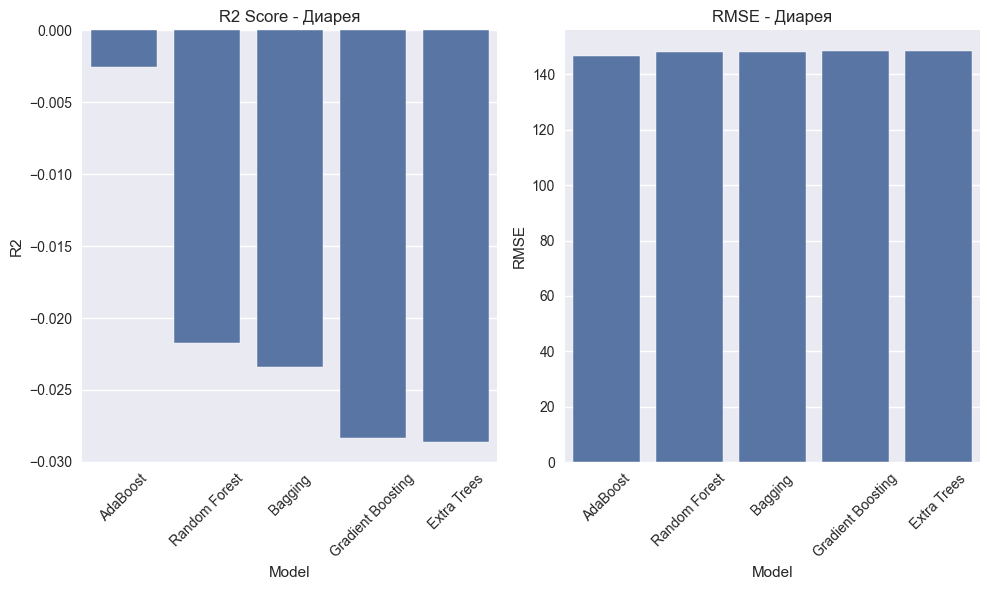

In [23]:
# Функция для визуализации результатов
def plot_results(results, title):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='R2', data=results.sort_values('R2', ascending=False))
    plt.title(f'R2 Score - {title}')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='RMSE', data=results.sort_values('RMSE'))
    plt.title(f'RMSE - {title}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_results(results_diarrhea, 'Диарея')


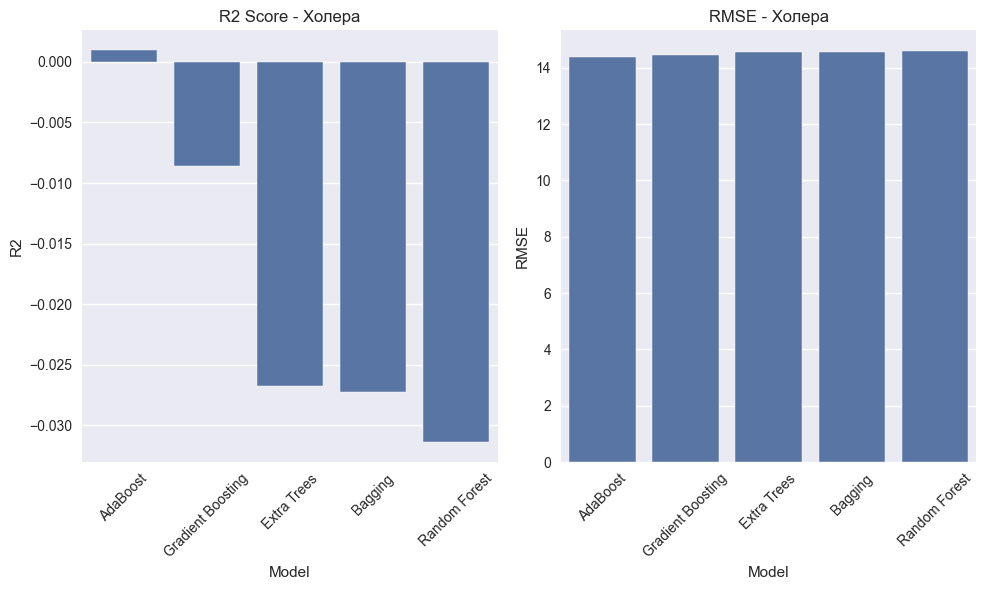

In [24]:
plot_results(results_cholera, 'Холера')


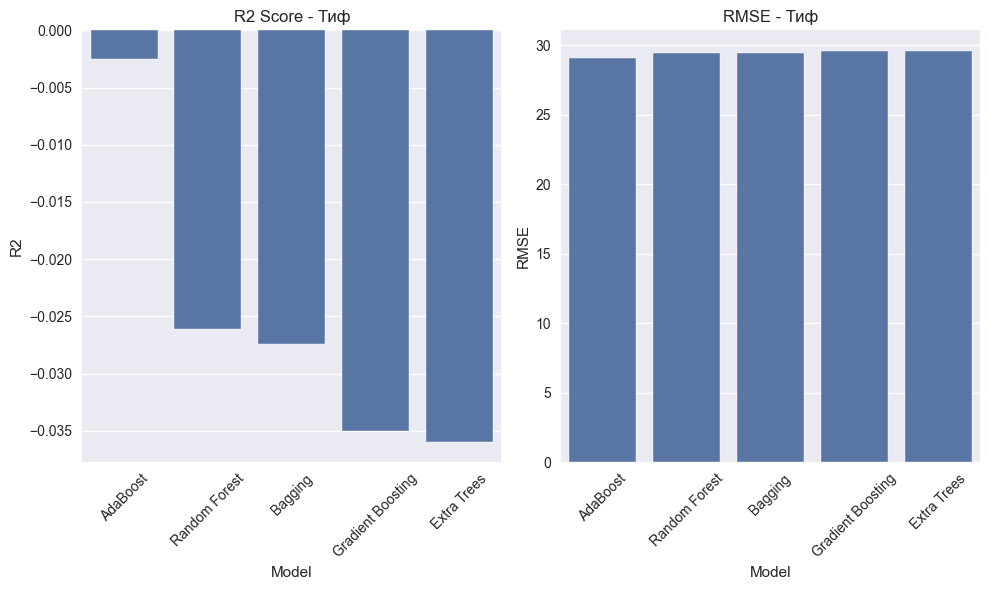

In [25]:
plot_results(results_typhoid, 'Тиф')

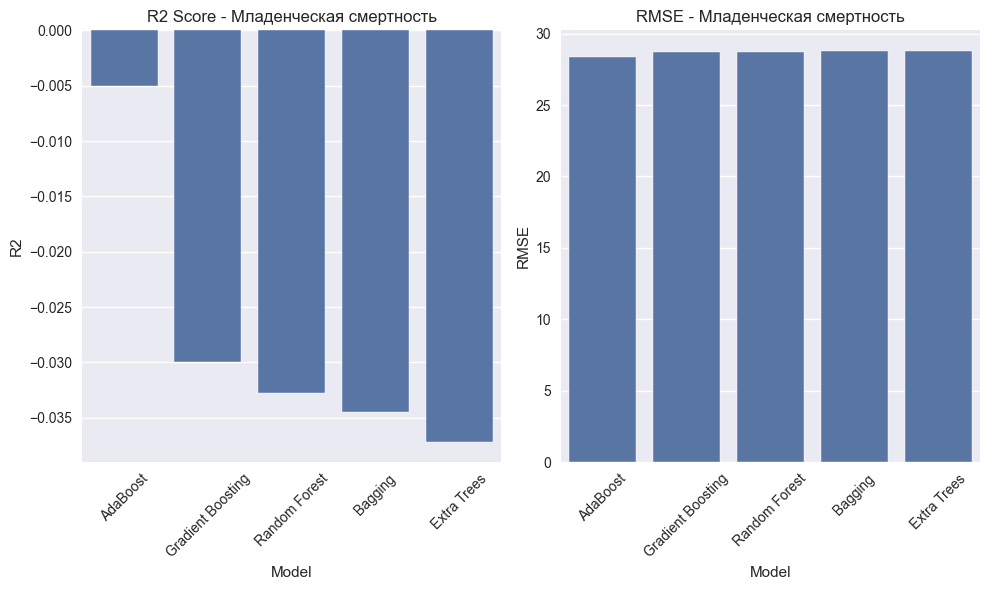

In [26]:
plot_results(results_infant, 'Младенческая смертность')

9. Анализ важности признаков

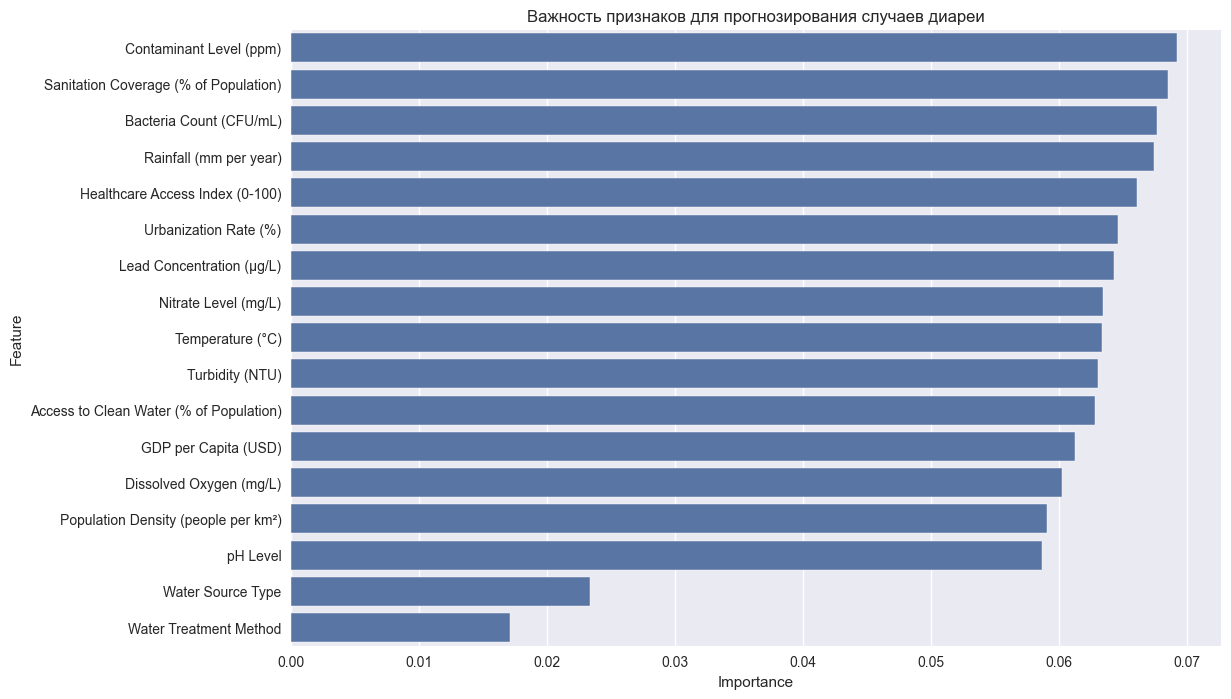

In [27]:
# Анализ важности признаков для лучшей модели (Random Forest)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train_d)

importances = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков для прогнозирования случаев диареи')
plt.show()